<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.3 Unconstrained Optimization**
Important Topics:
* Necessary and Suﬀicent Conditions of Local Minimizers
* Convexity and Global Minimizers
* Gradient Descent

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sympy as sp

#### **Necessary and Suﬀicent Conditions of Local Minimizers**:
* Global minimizer: $f (x) ≥ f (x^∗), ∀x ∈ℝ^d .$
* Local miniizer: $f (x) ≥ f (x^∗), ∀x ∈ B_δ (x^∗) / {x^∗}$
 * We will characterize local minimizers in terms of
the gradient and Hessian of the function
* Descent Direction:
 * generalizes the case when the derivative of a one dimensional function is negative
 * Case when the derivative of a one dimensional function is negative:
    * A vector $v$ is a descent
direction for $f$ at $x_0$ if there is
$α^∗ > 0$ such that
$f (x_0 +
αv) < f (x_0), ∀
α ∈ (0,
α^∗)$.
  * Continuously differentiable case:
   *  A vector v is a descent direction for $f$ at
$x_0$ if
$\frac{∂ f (x_0)}{
∂ v}$ = $∇ f (x_0)^T v < 0$,
that is, if the directional derivative of f at x0 in the direction v is negative.
 * Let f : $R^d → R$ be continuously differentiable at $x_0$ and assume that ∇ f ($x=0$)  /= 0. Then f has a descent
direction at x0.
  * The following theorem extends the result that the derivative of a function
is zero at a minimizer.
  * Let f : $R^d → R$ be continuously differentiable on $Rd$ . If $x_0$ is a local minimizer, then ∇ $f (x_0)$ = 0
  * Let f : $R^d → R$ be twice
continuously differentiable on $R^d$ . If ∇ f ($x_0$) = 0 and H f ($x_0$) is positive definite,
then $x_0$ is a strict local minimizer.




-2 is the point of local maxima
2 is the point of local minima


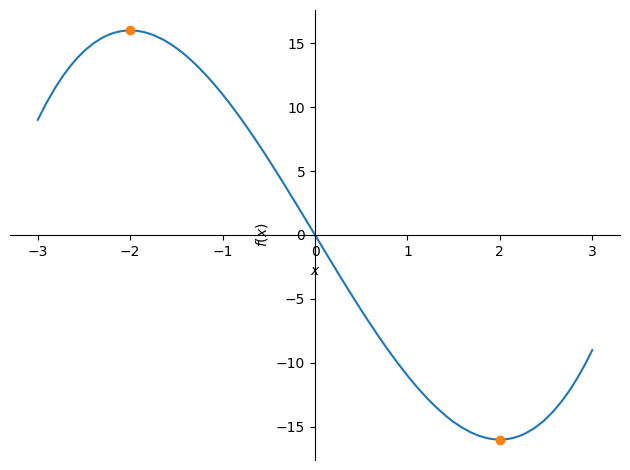

In [29]:
from sympy.plotting.plot import MatplotlibBackend, Plot
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt


def findMinMax(expr, x):
  yprime = sp.diff(expr,x)
  result = sp.solve(yprime)
  secDif = sp.diff(yprime,x)

  res1 = secDif.subs(x,result[0])
  res2 = secDif.subs(x,result[1])

  if(res1 > 0):
   print(f"{result[0]} is the point of local minima")
  else:
    print(f"{result[0]} is the point of local maxima")
  if(res2 < 0):
    print(f"{result[1]} is the point of local maxima")
  else:
    print(f"{result[1]} is the point of local minima")

  p = sp.plot(expr,(x,-3,3) , show = False)
  plt = get_sympy_subplots(p)
  plt.plot([result[0],result[1]], [expr.subs(x,result[0]),expr.subs(x,result[1])], "o")
  plt.show()

x=sp.Symbol('x')
expr1 = x**3 - 12*x
findMinMax(expr1, x)


#### **Convexity and Global Minimizers**:
* A real-valued function is called convex if the line segment between any two
points on the graph of the function lies above the graph between the two
points.

* Definition 3.3.11 (Convex Set) A set $D$ ⊆ $R^d$ is convex if for all x, y ∈ D and all α ∈ [0, 1]:\
(1 −
α)x +
αy ∈ D.

* Definition 3.3.13 (Convex Function) A function f : $R^d$ → $R$ is convex if, for
all x, y ∈ $R^d$ and all
α ∈ [0, 1] :\
 f ((1 −
α)x +
αy) ≤ (1 −
α) f (x) +
α f (y).

* For a convex function, suﬀicient (and therefore necessary) condition for minimizers is $∇ f (x_0) = 0$.
 * if true then $x_0$ is a global minimizer
* Theorem 3.3.19 (Global Minimizers of Convex Functions) Let f : $R^d $→ $R$ be
a convex function. Then any local minimizer of f is also a global minimizer


     3     2
1.5 x - 4 x - 3.5 x - 0.5
Solution: x=2.141048


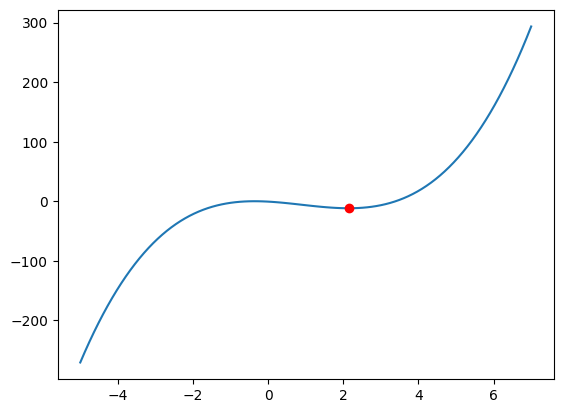

Optimization terminated successfully.
         Current function value: -11.607890
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 7
Solution: x=2.141048


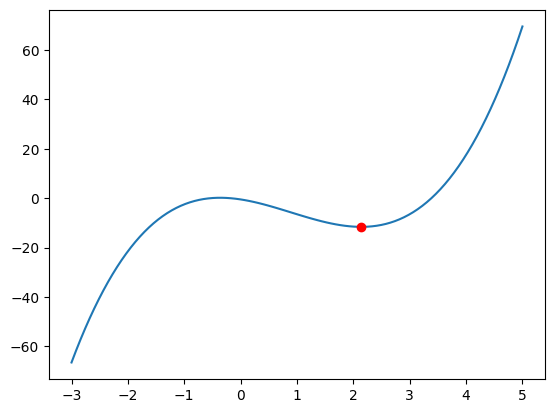

In [30]:
import scipy.optimize as opt
objective = np.poly1d([1.5, -4.0, -3.5, -0.5])
print(objective)
x0 = 4.0
results = opt.minimize(objective,x0)
print("Solution: x=%f" % results.x)
import matplotlib.pylab as plt
x = np.linspace(-5,7,100)
plt.plot(x,objective(x))
plt.plot(results.x,objective(results.x),'ro')
plt.show()

def objective(x,coeffs):
  return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]
coeffs = [1.5, -4.0, -3.5, -0.5]

results = opt.minimize(objective,x0,args=coeffs,options = {'disp':True})
print("Solution: x=%f" % results.x)
x = np.linspace(-3,5,100)
plt.plot(x,objective(x,coeffs))
plt.plot(results.x,objective(results.x,coeffs),'ro')
plt.show()

#### **Gradient Descent**:
* Gradient descent is an iterative optimization algorithm for finding a local
minimum of a differentiable function.

* We restrict ourselves to the unconstrained minimization problems of the form: \
$min_{
x∈Rd} f (x)$.
* find all stationary points of $f$ , that is, those $x$’s such that
$∇ f (x) = 0$. And then choose that $x$ among them that produces the smallest
value of $f (x)$.
* Consider the least-squares problem
$min_{x∈Rd} ||Ax − b||^2$,
 * The objective
function is a quadratic function:
$f (x) = ∥Ax − b∥^2 = (Ax − b)^T (Ax − b) = x^T A^T Ax − 2b^T Ax + b^T b$.
 * $∇ f (x) = 2A^T Ax − 2A^T b$
 * where we used that $A^T A$ is symmetric. So the stationary points satisfy:\
$A^T Ax = A^T b$
 * Hessian of $f$ is
$H f (x) = 2A^T A$
 * This Hessian is clearly PSD, since for any $z ∈ R^d$
$⟨z, 2A^T Az⟩ = 2(Az)^T (Az) = 2∥Az∥^2 ≥ 0$.
 * So any local minimizer, which is necessarily a stationary point, is also a global
minimizer. So we have found all global minimizers.
* Steepest Descent:
 * The steepest descent approach is to find smaller values of f by successively
following directions in which f decreases.
   * −∇ f provides such a direction
  * At each iteration of steepest descent, we take a step in the direction of the
negative of the gradient, that is:\
$x^{k+1} = x^k −
α_k∇ f (x^k)$, $k = 0, 1, 2 . . . $
 * for a sequence of steplengths
$α_k$ > 0.
$α_k$ are called step sizes.
 * we
will not be able to guarantee that a global minimizer is reached in the limit,
even if one exists.
 * Then steepest descent started from any $x_0$ produces a sequence $x_k, k = 1, 2, . . .$
such that if $∇ f (x_k)  /= 0$, then
$f (x^{k+1}) ≤ f (x_k$), $∀k$ ≥ 1



Thetas: [[2.13115793]
 [3.01637887]]


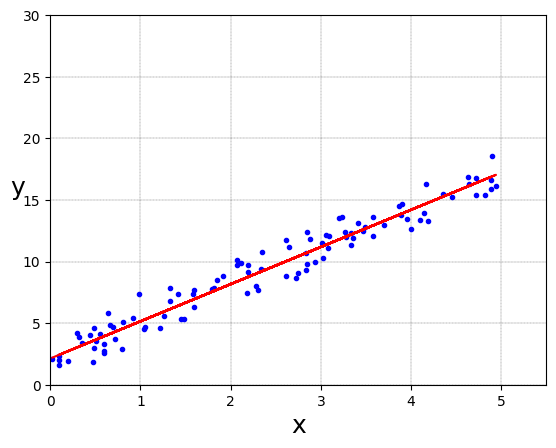

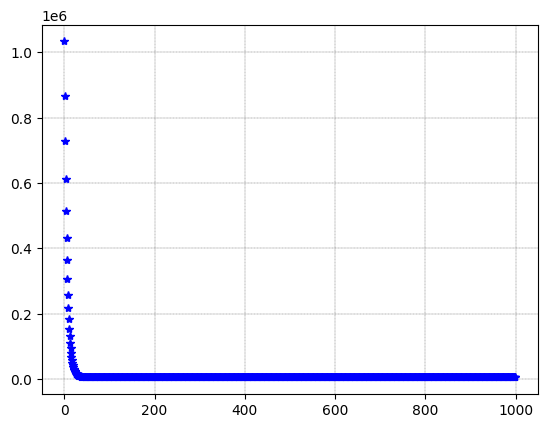

In [31]:
# generate random data
np.random.seed(0)
x = 5 * np.random.rand(100,1)
y = 2 + 3 * x + np.random.randn(100,1)

plt.plot(x,y,'b.')
plt.xlabel("x", fontsize=10)
plt.ylabel("y", rotation=0, fontsize=10)
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
_ =plt.axis([0,5.5,0,30])

add_ones=np.ones((len(x), 1))
x_data=np.hstack((add_ones,x))

def GradientDescent(X,y,theta,lr=0.01,n_iters=100):
    m = len(y)
    costs = []
    for _ in range(n_iters):
        y_hat = np.dot(X,theta)
        theta = theta -(1/m) * lr * (np.dot(X.T,(y_hat - y)))
        cost = (1/2*m) * np.sum(np.square(y_hat-y))
        costs.append(cost)
    return theta, costs

class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.cost = np.zeros(self.n_iters)

    def train(self, x, y):
        self.theta =np.random.randn(x.shape[1],1)
        thetas,costs=GradientDescent(x,y,self.theta,self.lr,self.n_iters)
        self.theta=thetas
        self.cost=costs
        return self
    def predict(self, x):
        return np.dot(x, self.theta)

# Initialize the model
model = LinearRegression(lr=0.01, n_iters=1000)
# Train the data
model.train(x_data, y)
# printing thetas values
print('Thetas:' ,model.theta)
# Predict
y_predicted = model.predict(x_data)
# Plot original data points
plt.scatter(x, y, s=5,color='b')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
# Draw predicted line
plt.plot(x, y_predicted, color='r')
_ =plt.axis([0,5.5,0,30])
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

cost=model.cost
# Plot cost
plt.plot(range(len(cost)), cost, 'b*')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

#source: https://machinelearningspace.com/a-comprehensive-guide-to-gradient-descent-algorithm/